# EJECUTOR - SMS FACTURACIÓN
En este notebook contiene el llamado a las funciones necesarias para resolver el  ejercicio solicitado.

In [1]:
# Importar funciones

from SMS_Facturacion_Funciones import *
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('SMSFacturacion').getOrCreate()

Definicion de parámetros

In [2]:
path_eventos = "/home/jovyan/data_in/events.csv.gz"
path_destinos_gratis = "/home/jovyan/data_in/free_sms_destinations.csv.gz"

path_salida_parquet = "/home/jovyan/data_out/top_usuarios_sms"
path_histograma = "/home/jovyan/data_out/histograma_llamadas.png"

# Comienzo de ejecucion del proceso

Carga y limpieza de datos

In [3]:
df_eventos = cargar_eventos(spark, path_eventos)

df_destinos_gratis = cargar_destinos_gratis(spark, path_destinos_gratis)

df_eventos = filtrar_nulos(df_eventos)

Cálculo de SMS

In [4]:
df_eventos = calcular_monto_sms(df_eventos, df_destinos_gratis)

df_top = top_usuarios(df_eventos)

guardar_parquet(df_top, path_salida_parquet)

Cálculo de llamadas

In [5]:
df_llamadas = llamadas_por_hora(df_eventos)

Grafico de llamadas

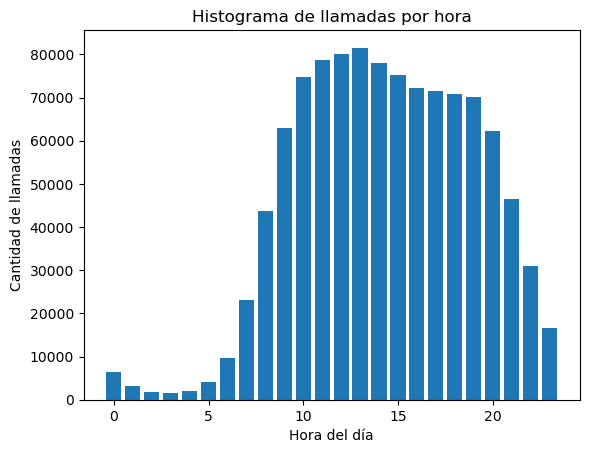

In [6]:
import matplotlib.pyplot as plt

horas = df_llamadas.select("hour").rdd.flatMap(lambda x: x).collect()
llamadas = df_llamadas.select("sum(calls)").rdd.flatMap(lambda x: x).collect()

plt.bar(horas, llamadas)
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de llamadas")
plt.title("Histograma de llamadas por hora")
plt.savefig(path_histograma)